In [11]:
import numpy as np#load ice cube data
files=["IC40_exp.csv","IC59_exp.csv","IC79_exp.csv","IC86_I_exp.csv","IC86_II_exp.csv", 
       "IC86_III_exp.csv","IC86_IV_exp.csv","IC86_V_exp.csv","IC86_VI_exp.csv",
       "IC86_VII_exp.csv"]

In [12]:
data=np.loadtxt("IC40_exp.csv")
for name in files:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T

In [13]:
fields=[log10_E,RA,Dec,Ang_err]
print(Ang_err)
iceang=fields[3]

[0.48 0.62 0.56 ... 0.3  0.21 0.25]


In [14]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [15]:
J189_0037G_ra=(282.37)
J189_0037G_dec=(0.62)
print(J189_0037G_ra,J189_0037G_dec)


282.37 0.62


In [16]:
RA_1=np.array([J189_0037G_ra])
dec_1=np.array([J189_0037G_dec])
print(RA_1)
print(dec_1)
#dec_11=np.array

[282.37]
[0.62]


In [17]:
data2=np.array([RA_1,dec_1])#combine both arrays into 1(ra,dec)
print(data2)

[[282.37]
 [  0.62]]


In [18]:
ice_ra=(fields[1])
ice_dec=(fields[2])
red_ra=(RA_1)
red_dec=(dec_1)

print(ice_dec)
print(red_ra)
print(red_dec)
type(ice_dec)

[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[282.37]
[0.62]


numpy.ndarray

In [19]:
icegrid1,redgrid1=np.meshgrid(ice_ra,red_ra)
icegrid2,redgrid2=np.meshgrid(ice_dec,red_dec)
print(icegrid1,redgrid1)
paired_ra = np.vstack([icegrid1.ravel(), redgrid1.ravel()])
paired_dec = np.vstack([icegrid2.ravel(), redgrid2.ravel()])

[[203.024  75.024  97.501 ... 308.127 332.199 213.309]] [[282.37 282.37 282.37 ... 282.37 282.37 282.37]]


In [10]:
ra_icecube =np.deg2rad (paired_ra[0])  # RA of IceCube sources
ra_red_dwarf =np.deg2rad (paired_ra[1])  # RA of red dwarfs
dec_icecube = np.radians(paired_dec[0])  # Dec of IceCube sources
dec_red_dwarf = np.radians(paired_dec[1])
print(ra_icecube)
print(ra_red_dwarf)
ra_diff=np.subtract(ra_icecube,ra_red_dwarf)
print(ra_diff)
print(dec_red_dwarf)
len(dec_red_dwarf)

[3.54343726 1.30941582 1.70171347 ... 5.37783066 5.79796632 3.72294437]
[4.92828621 4.92828621 4.92828621 ... 4.92828621 4.92828621 4.92828621]
[-1.38484895 -3.61887039 -3.22657273 ...  0.44954446  0.86968011
 -1.20534183]
[0.01082104 0.01082104 0.01082104 ... 0.01082104 0.01082104 0.01082104]


1171331

In [20]:
Ang_sep=np.arccos(np.abs(np.add(np.multiply(np.sin(dec_icecube),np.sin(dec_red_dwarf)),(np.multiply(np.multiply(np.cos(dec_icecube),np.cos(dec_red_dwarf)),np.cos(ra_diff))))))
print(Ang_sep)

[1.38967342 0.52240277 0.22437039 ... 0.83544734 1.08609412 1.20570425]


In [37]:
def sig( declcut):#declcut means declination cutoff in degrees
    decdiff=np.abs(np.subtract(ice_dec,red_dec))
    nuind=np.nonzero(decdiff < declcut)
    sg=np.deg2rad(iceang[nuind])**2
    Ang_sep1=np.arccos(np.abs(np.add(np.multiply(np.sin(dec_icecube[nuind]),np.sin(dec_red_dwarf[nuind])),(np.multiply(np.multiply(np.cos(dec_icecube[nuind]),np.cos(dec_red_dwarf[nuind])),np.cos(np.subtract(ra_icecube[nuind],ra_red_dwarf[nuind])))))))**2
    return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))

def bgs(band, twopi = False): 

    if twopi == True:
        s_ang = (np.sin(np.deg2rad(dec_red_dwarf[nuind] + band)) - np.sin(np.deg2rad(dec_red_dwarf[nuind] - band)))*(2 * np.pi)
        return 1/s_ang
    else:
        s_ang = (np.sin(np.deg2rad(dec_red_dwarf[nuind] + band)) - np.sin(np.deg2rad(dec_red_dwarf[nuind] - band)))
        return 1/s_ang
def P(ns,N,S,B):
    nsN=ns/N
    return np.add(np.multiply(nsN,S),np.multiply(np.subtract(1,nsN),B))
def TS(ns,N,S,B):
    return 2*np.sum(np.log((P(ns,N,S,B)/B)))
#from scipy.optimize import minimize
#def ns_for_TSmax(S, B, N):
 #   nll = lambda x: -TS(n, S, B, N)
 #   soln = minimize(nll, 6 ,bounds=((0,None),))
  #  ns = float(soln.n)
  #  return ns
declcut = 5  
ns_values = np.linspace(0, 4, 100)
ns=ns_values
decdiff=np.abs(np.subtract(ice_dec,red_dec))
nuind=np.nonzero(decdiff < declcut)
N=len(nuind)
nsN=ns/N
print(nsN.shape)

print(bgs(5,twopi=False))
#print(sig(5)[1])
#no=len(sig(0,5))
#print(no)


#redno = 0

cut=5
band = 5


S =(sig(5)) 
print(S.shape)
B = bgs(band, twopi=True)
print(B.shape)
#b=len(dec_red_dwarf[nuind])
#print([P(ns,N,S,B)for ns in ns_values])
#print([TS(ns,N,S,B)for ns in ns_values]
#N=39315
#print(N)
#print(S.shape)
#print(a)

(100,)
[5.73685673 5.73685673 5.73685673 ... 5.73685673 5.73685673 5.73685673]
(157430,)
(157430,)


In [32]:
sig( 5)

array([5.45460269e-25, 0.00000000e+00, 0.00000000e+00, ...,
       5.63473198e-36, 0.00000000e+00, 0.00000000e+00])

In [35]:
TS_values =(TS(0, N, S, B))
print(TS_values)

0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_9828\3469160569.py:20: RuntimeWarning: invalid value encountered in log
  return 2*np.sum(np.log((P(ns,N,S,B)/B)))


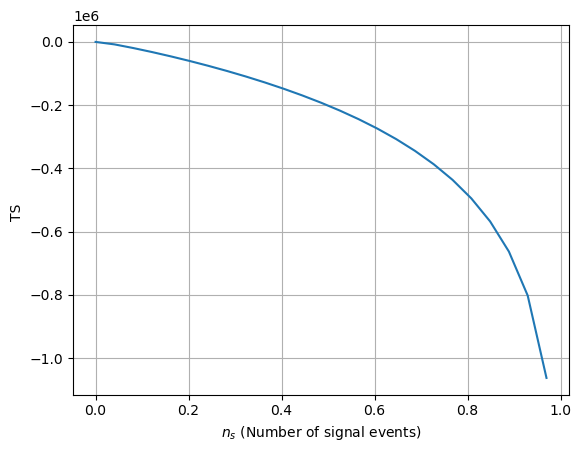

In [36]:
#Calculate TS for each value of ns
TS_values =( [TS(ns, N, S, B) for ns in ns_values])
#print(TS_values)
import matplotlib.pyplot  as plt
# Plot the TS values
plt.plot( ns_values,TS_values)
#.text(x=3.5, y=5, s="V388 Cas", fontsize=12, color='black')
plt.xlabel(r'$n_s$ (Number of signal events)')
plt.ylabel('TS ')
plt.grid(True)
#plt.title('TS as a function of $n_s$')

#filered0 = r'C:\Users\DELL\red_dwarf0_likelyhood.png'
#plt.savefig(filered0)
